In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#This block is just for importing relevant libraries

# Q1 

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independent Gaussian with mean 10 and standard
deviation 5.

*(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe? *

*(b) Estimate the mean and the variance of the sum. *

The mean of the sum of the two 1000 point draws is:  -0.09107435926181222  and the standard deviation is:  7.18292106290732


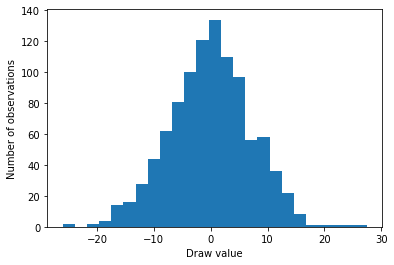

In [3]:
mu1 = -10
sigma1 = 5
obs1 = np.random.normal(mu1, sigma1, 1000)

mu2 = 10
sigma2 = 5
obs2 = np.random.normal(mu2, sigma2, 1000)

obs3 = np.add(obs1, obs2)
labels = ['Value', 'Number of observations']
plt.hist(obs3,bins=25,label=labels)
plt.xlabel('Draw value')
plt.ylabel('Number of observations')

obs3_mu = np.mean(obs3)

obs3_sigma = np.std(obs3)

print("The mean of the sum of the two 1000 point draws is: ",obs3_mu," and the standard deviation is: ",obs3_sigma)

# Q2

**Central Limit Theorem**
Let Xi be an iid Bernoulli random variable with value {-1,1}. Look at the random variable Zn (stated in the problem description).

*By taking 1000 draws from Zn, plot its histogram.*

Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

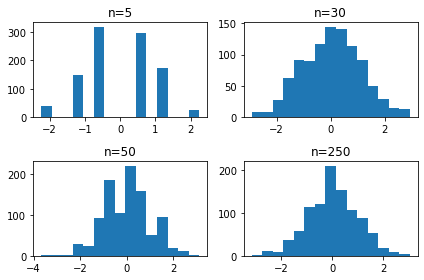

In [14]:
def draw_Z(num_draws):
    temp_array = np.random.binomial(size=num_draws, n=1, p= 0.5)
    temp_array[temp_array == 0] = -1
    Z = (np.sum(temp_array)/np.sqrt(num_draws))
    return (Z)

figure, axes = plt.subplots(nrows=2, ncols=2)

num_draws=5
int_array = np.zeros(1000)
for i in range(1000):
    int_array[i] = draw_Z(num_draws)
#print(int_array)
axes[0,0].hist(int_array, bins = 15)
axes[0, 0].set_title('n=5')



num_draws=30
int_array = np.zeros(1000)
for i in range(1000):
    int_array[i] = draw_Z(num_draws)
#print(int_array)
axes[0,1].hist(int_array, bins = 15)
axes[0,1].set_title('n=30')

num_draws=50
int_array = np.zeros(1000)
for i in range(1000):
    int_array[i] = draw_Z(num_draws)
#print(int_array)
axes[1,0].hist(int_array, bins = 15)
axes[1,0].set_title('n=50')

num_draws=250
int_array = np.zeros(1000)
for i in range(1000):
    int_array[i] = draw_Z(num_draws)
#print(int_array)
axes[1,1].hist(int_array, bins = 15)
axes[1,1].set_title('n=250')

figure.tight_layout()

# Q3

Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [4]:
mu4 = 0
sigma4 = 5
num_obs4 = 25000
obs4 = np.random.normal(mu4, sigma4, num_obs4)

mean_obs4 = np.sum(obs4)/num_obs4
int_array1 = np.full((num_obs4), mean_obs4)
int_array2 = np.subtract(obs4,int_array1)
int_array3 = np.multiply(int_array2,int_array2)
stdev_obs4 = np.sqrt(np.sum(int_array3)/(num_obs4-1))

print("The calculated mean is: ",mean_obs4," and the standard deviation is: ",stdev_obs4)

The calculated mean is:  0.036019457348209195  and the standard deviation is:  5.0093222096439


# Q4

Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution provided in problem description.

Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [15]:
mean_arr = [-5, 5]
cov_mat = [[20, 0.8], [0.8, 30]]
num_obs5 = 10000

obs5 = np.empty(shape=(num_obs5,2))
for i in range(num_obs5):
    obs5[i] = np.random.multivariate_normal(mean_arr,cov_mat)

mean_arr_est = obs5.sum(axis=0)/num_obs5
print(mean_arr_est)

int_array4 = np.full([num_obs5,2], mean_arr_est)
D_cent = np.subtract(obs5,int_array4)
temp_array = np.matmul(np.transpose(D_cent),D_cent)
print(temp_array/(num_obs5-1))

#print(np.cov(np.transpose(obs5)))


[-5.00598256  5.11862717]
[[19.46450337  0.83312153]
 [ 0.83312153 29.02043498]]


# Q5

Download from Canvas/Files the dataset PatientData.csv.
Each row is a patient and the last column is the condition that the patient has. Do data
exploration using Pandas and other visualization tools to understand what you can about the
dataset. For example:

*(a) How many patients and how many features are there?*

*(b) What is the meaning of the first 4 features? See if you can understand what they mean.*

*(c) Are there missing values? Replace them with the average of the corresponding feature column*

*(d) How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.*

In [10]:
dataset = pd.read_csv("PatientData.csv", header=None)

print(dataset.head())

num_patients = dataset.shape[0]
num_features = dataset.shape[1]

#print(dataset[279].describe(percentiles = [0.05,0.25,0.5,0.75,0.95]))

print("a) The number of patients is: ",num_patients," and the number of features is: ",num_features)

print("b) The first 4 features appear to be age, gender, height, and weight.")

cols = list(dataset.columns) 
dataset[cols] = pd.to_numeric(dataset[cols].stack(), errors='coerce').unstack()
print("c) There are missing values in the dataset: ",dataset.isnull().any().any())
dataset_1=dataset.fillna(dataset.mean())
print("The missing values have been filled with the average of the corresponding columns.")

Pearson_mat = dataset.corr()
cor_target = abs(Pearson_mat[279])
relevant_features = cor_target[cor_target>0.3]
print(relevant_features)

   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]
a) The number of patients is:  452  and the number of features is:  280
b) The first 4 features appear to be age, gender, height, and weight.
c) There are missing values in the dataset:  True
The missing values have been filled with the average of the corresponding columns